In [1]:
import matplotlib.pyplot as plt
import numpy as np
import time
from PIL import Image

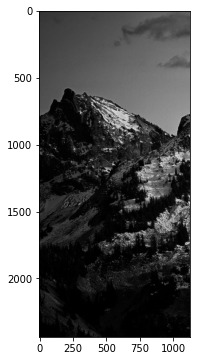

In [21]:
img = Image.open('Jowhareh_galleries_poster_491d7316-c686-417e-b129-6530c48091cf.jpeg')
imggray = img.convert('LA')
plt.figure(figsize=(9, 6))
plt.imshow(imggray)

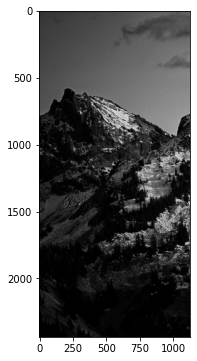

In [22]:
imgmat = np.array(list(imggray.getdata(band=0)), float)
imgmat.shape = (imggray.size[1], imggray.size[0])
imgmat = np.matrix(imgmat)
plt.figure(figsize=(9,6))
plt.imshow(imgmat, cmap='gray');

In [8]:
U, sigma, V = np.linalg.svd(imgmat)

In [9]:
U.shape

(2436, 2436)

In [13]:
V.shape

(1125, 1125)

In [14]:
sigma.shape

(1125,)

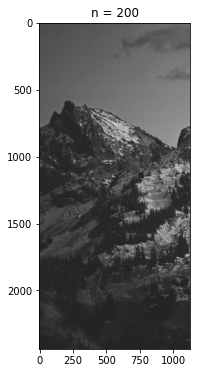

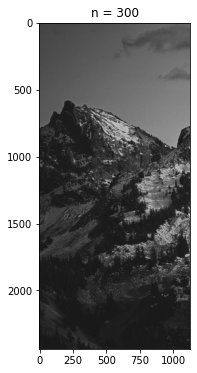

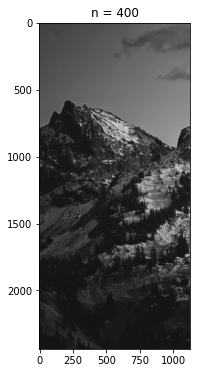

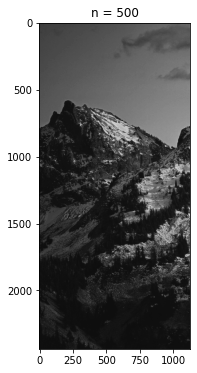

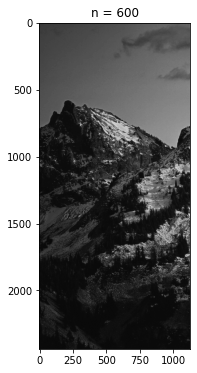

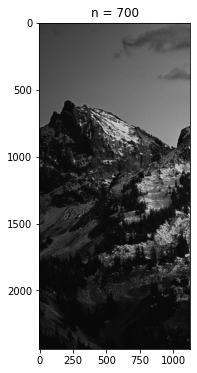

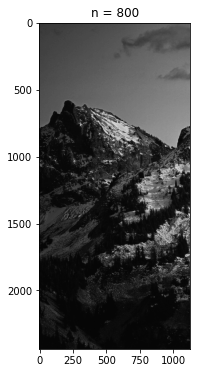

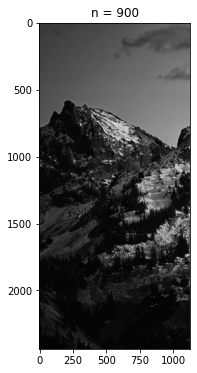

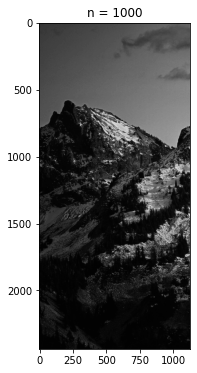

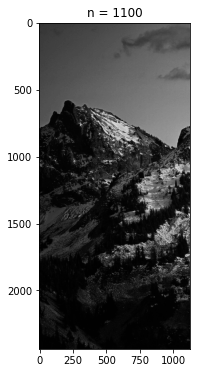

In [15]:

for i in range(200,1125,100):
    reconstimg = np.matrix(U[:, :i]) * np.diag(sigma[:i]) * np.matrix(V[:i, :])
    plt.figure(figsize=(9,6))
    
    plt.imshow(reconstimg, cmap='gray')
    title = "n = %s" % i
    plt.title(title)
    plt.show()

برا پیدا کردن بهترین  عدد از تابع زیر استفاده می کنیم

In [16]:
def find_best_i(sigma, threshold=0.9):
    total_sum = np.sum(sigma)
    sum_i = 0
    for i, s in enumerate(sigma):
        sum_i += s
        if sum_i / total_sum >= threshold:
            return i+1
    return len(sigma)

In [17]:
i = find_best_i(sigma)
reconstimg = np.matrix(U[:, :i]) * np.diag(sigma[:i]) * np.matrix(V[:i, :])

In [18]:
i

516

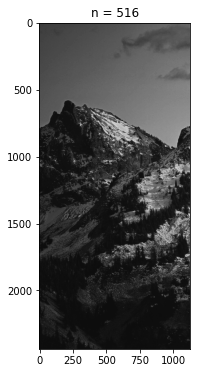

In [19]:
plt.figure(figsize=(9,6))

plt.imshow(reconstimg, cmap='gray')
title = "n = %s" % i
plt.title(title)
plt.show()